# **1HR OMNI Dataset for OCB Model**

**Author:** Arnav Singh 
**Date:** 2024-07-30

---

## **Abstract**

For this notebook, the 1HR merged OMNI dataset will be used including variables such as Kp, 

## **Keywords**

- Keyword 1
- Keyword 2
- Keyword 3

---

## **Table of Contents**

1. [Introduction](#introduction)
2. [Data Description](#data-description)
3. [Data Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Model Selection](#model-selection)
7. [Model Training](#model-training)
8. [Model Evaluation](#model-evaluation)
9. [Hyperparameter Tuning](#hyperparameter-tuning)
10. [Results and Discussion](#results-and-discussion)
11. [Conclusion](#conclusion)
12. [References](#references)
13. [Appendix](#appendix)

---

## **Introduction**

Introduce the problem statement, background information, and the significance of the modeling project.

---



In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### OMNI 1 HR merged
Courtsey of NASA SPDF

In [2]:
omni_df = pd.read_csv('data/OMNI2_H0_MRG1HR_3316029.csv', comment='#')
## Convert first column to datetime
omni_df['TIME_AT_CENTER_OF_HOUR_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(
    omni_df['TIME_AT_CENTER_OF_HOUR_yyyy-mm-ddThh:mm:ss.sssZ'], 
    utc=True)
omni_df.head()

TIME_AT_CENTER_OF_HOUR_yyyy-mm-ddThh:mm:ss.sssZ  1AU_IP_MAG_AVG_B-VECTOR_nT  \
0                       1983-12-01 00:30:00+00:00                       999.9   
1                       1983-12-01 01:30:00+00:00                       999.9   
2                       1983-12-01 02:30:00+00:00                       999.9   
3                       1983-12-01 03:30:00+00:00                       999.9   
4                       1983-12-01 04:30:00+00:00                       999.9   

   1AU_IP_BX__GSE_nT  1AU_IP_BY__GSM_nT  1AU_IP_BZ__GSM_nT  \
0              999.9              999.9              999.9   
1              999.9              999.9              999.9   
2              999.9              999.9              999.9   
3              999.9              999.9              999.9   
4              999.9              999.9              999.9   

   1AU_IP_N_(ION)_Per_cc  1AU_IP_PLASMA_SPEED_Km/s  1AU_IP_FLOW_PRESSURE_nPa  \
0                  999.9                    9999.0                     99.99   
1                  999.9                    9999.0                     99.99   
2                  999.9                    9999.0                     99.99   
3                  999.9                    9999.0                     99.99   
4                  999.9                    9999.0                     99.99   

   DAILY_SUNSPOT_NO_  DAILY_F10.7_  3-H_KP*10_  1-H_DST_nT  1-H_AE_nT  \
0                 36          90.5          33         -17        206   
1                 36          90.5          33         -19        309   
2                 36          90.5          33         -21        293   
3                 36          90.5          33         -20        205   
4                 36          90.5          33         -16        187   

   1-H_AL-INDEX_nT  1-H_PC(N)-INDEX_  
0             -126               1.0  
1             -178               2.2  
2             -139               2.8  
3              -82               1.5  
4              -89               1.1

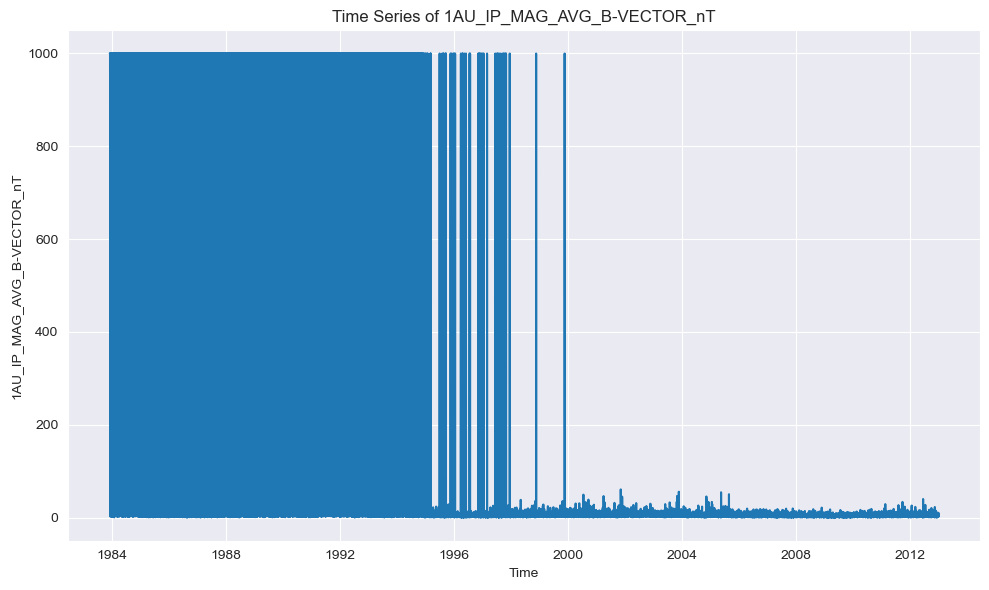

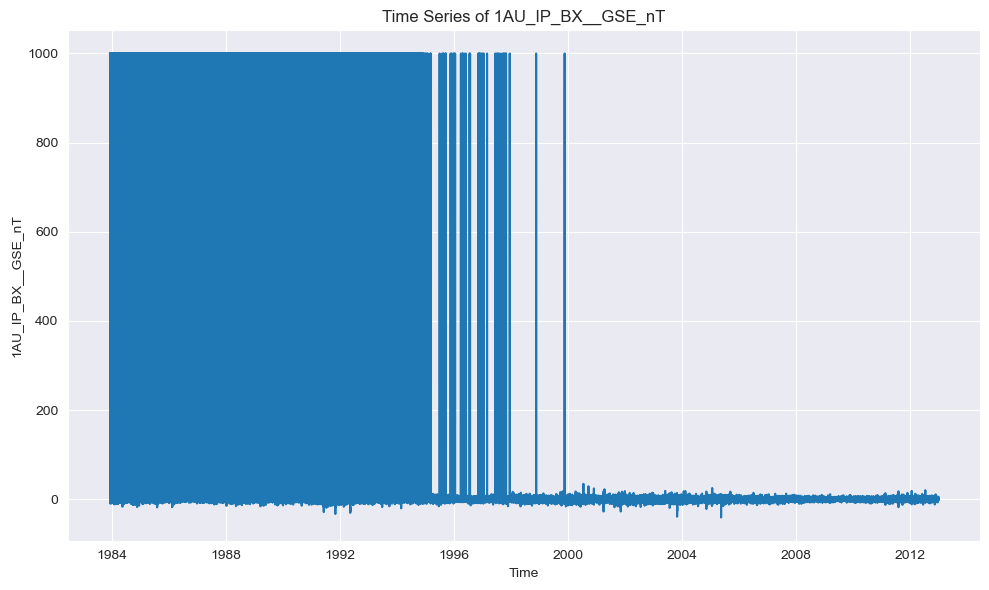

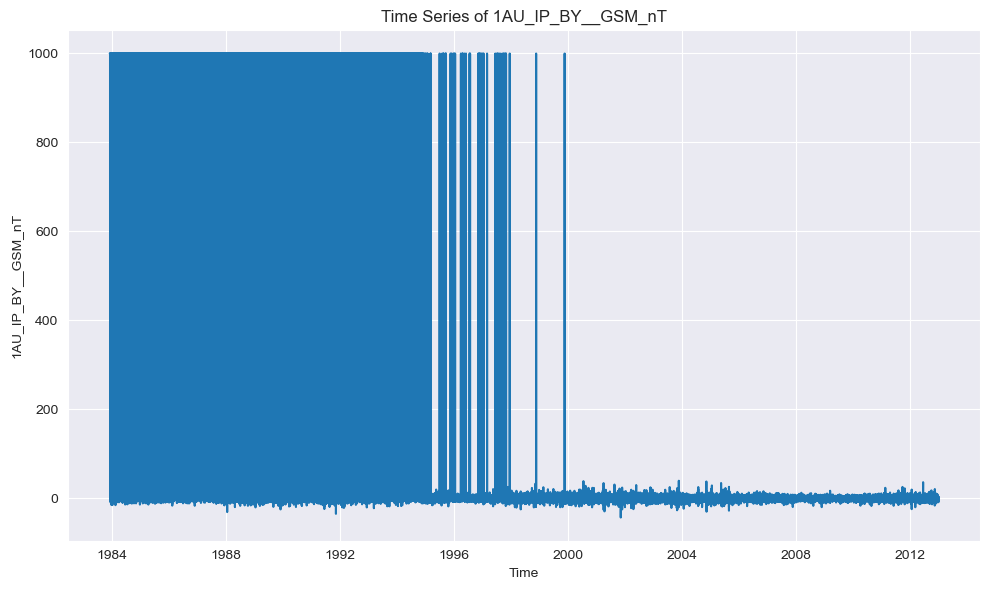

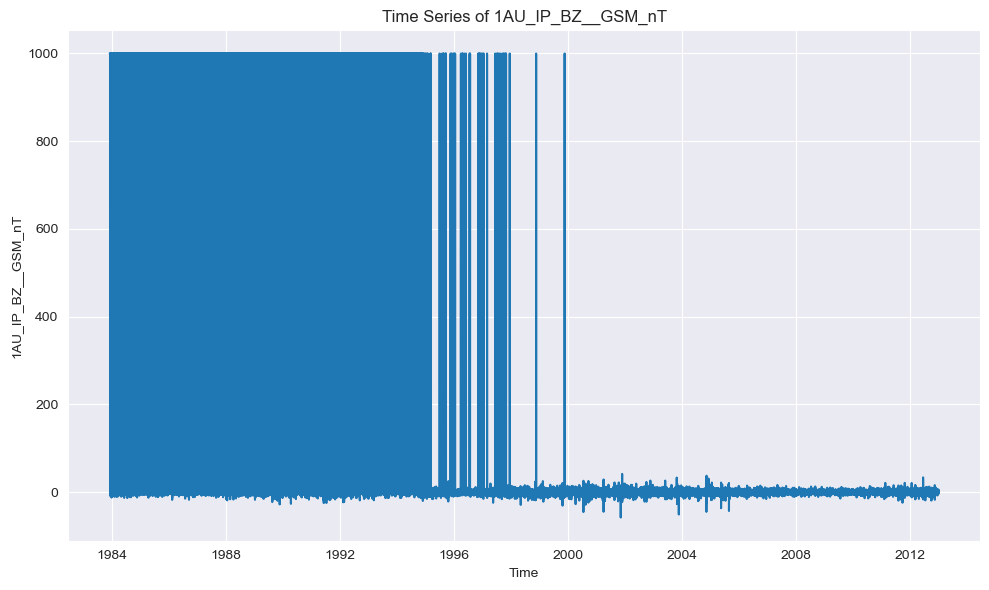

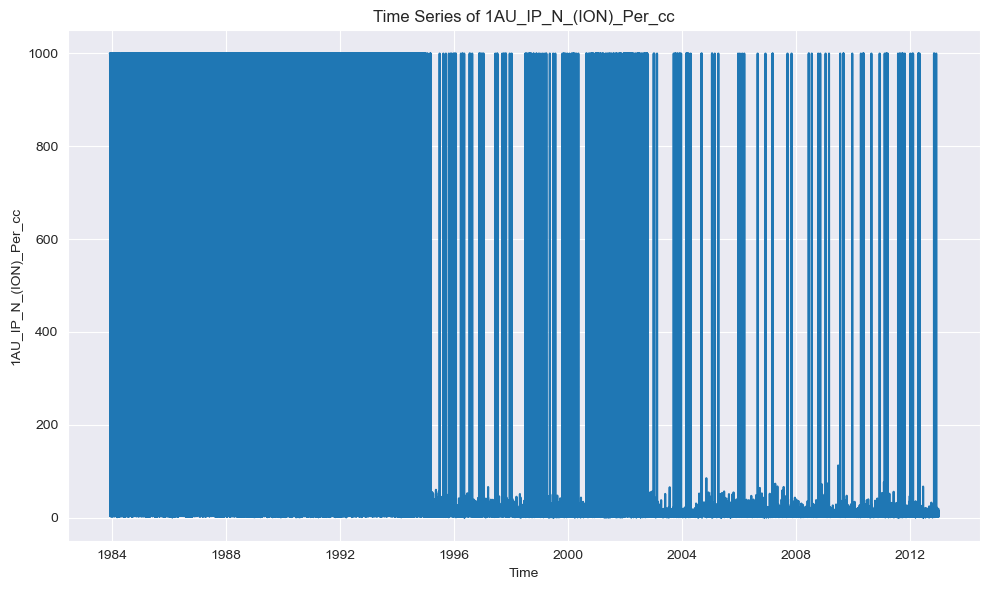

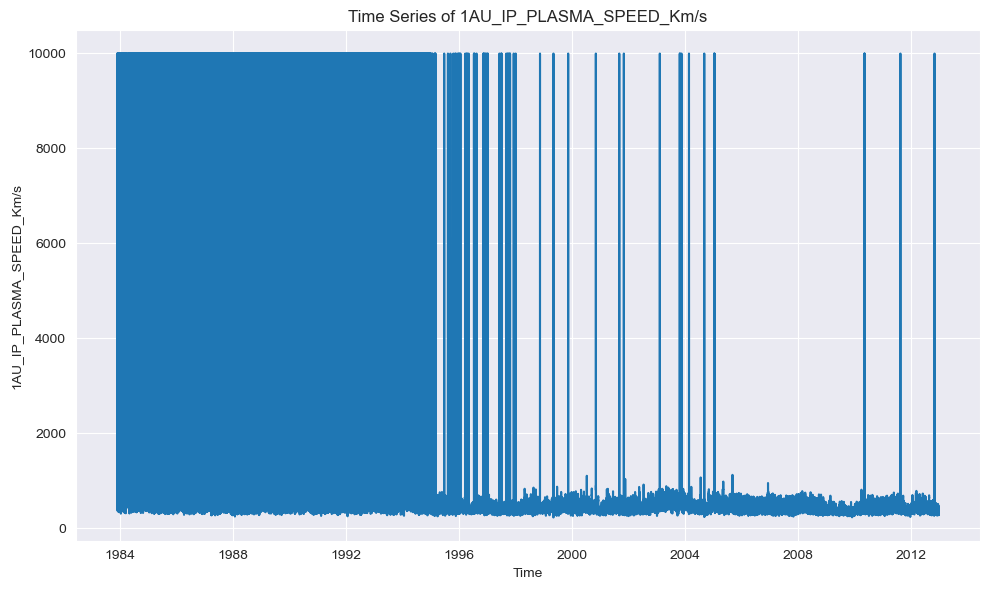

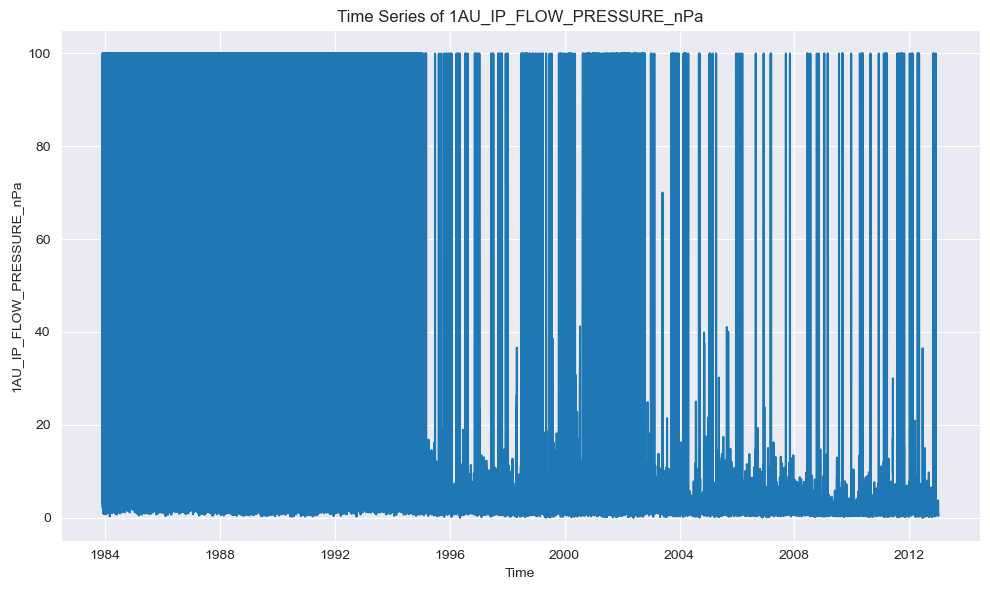

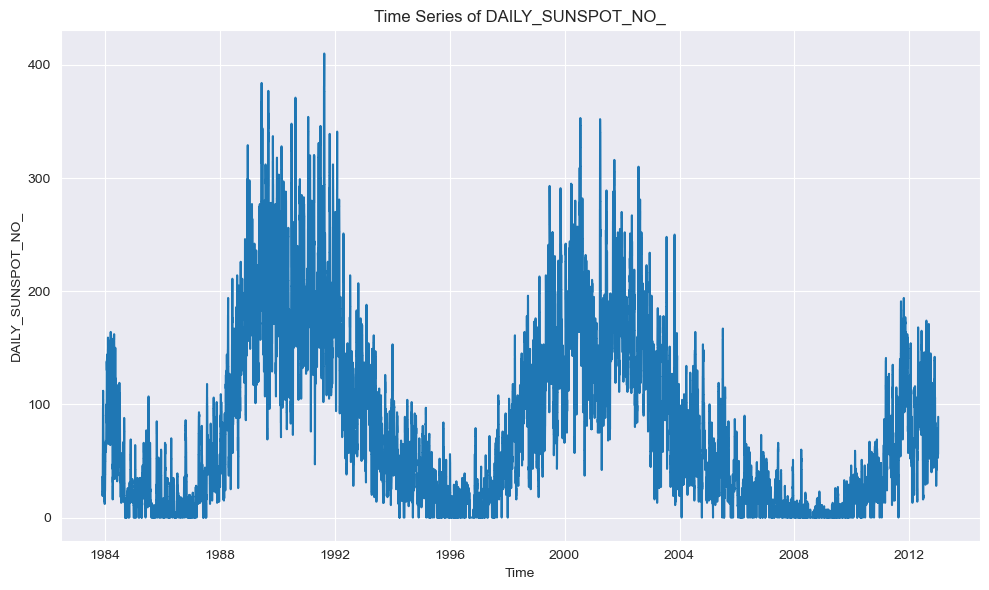

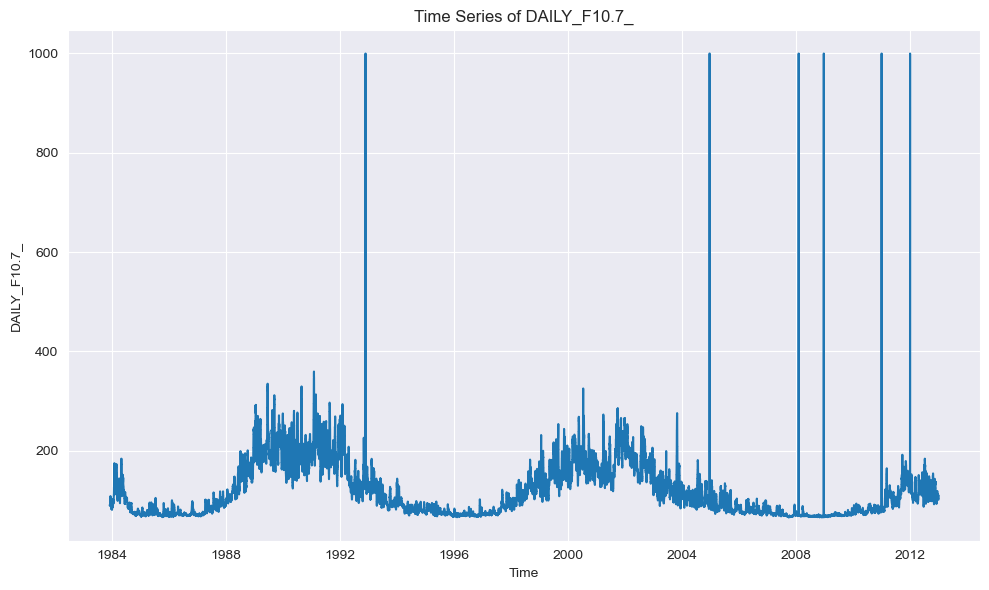

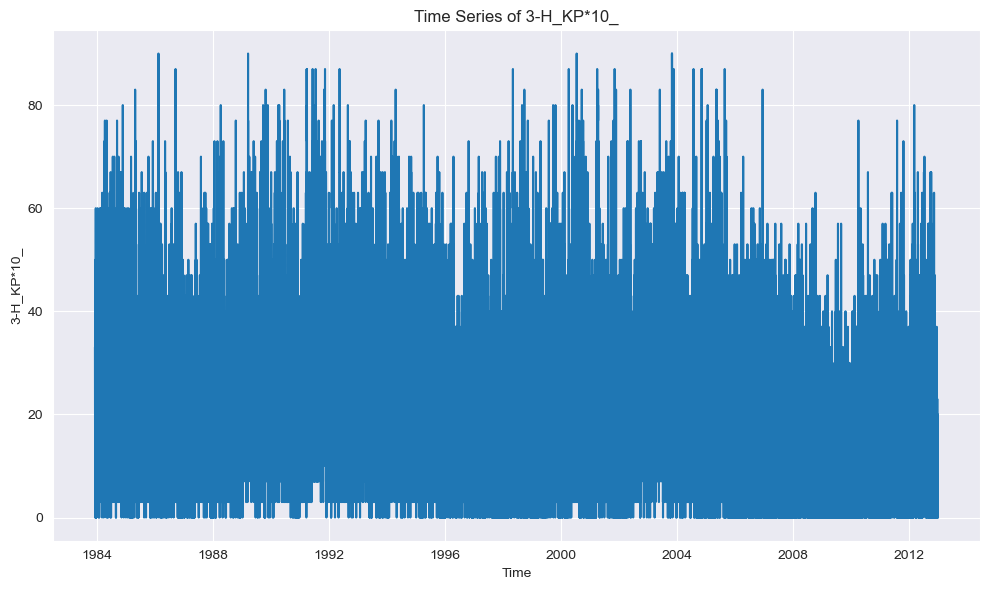

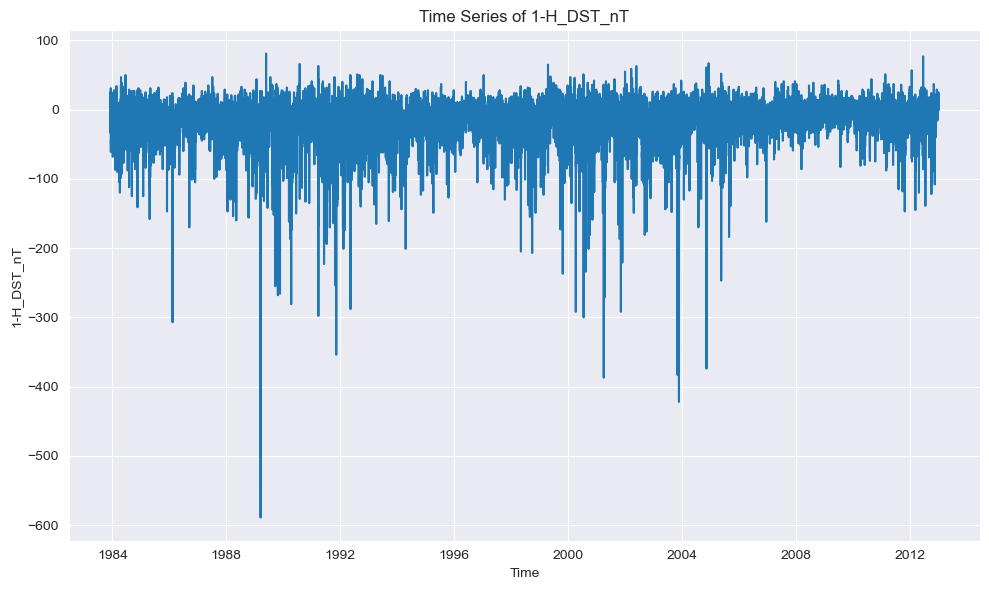

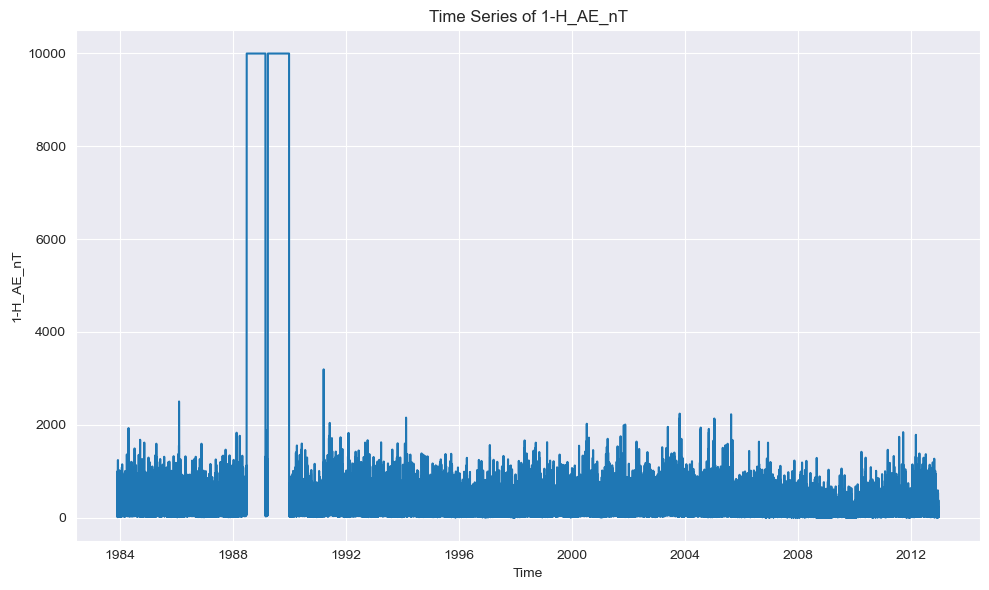

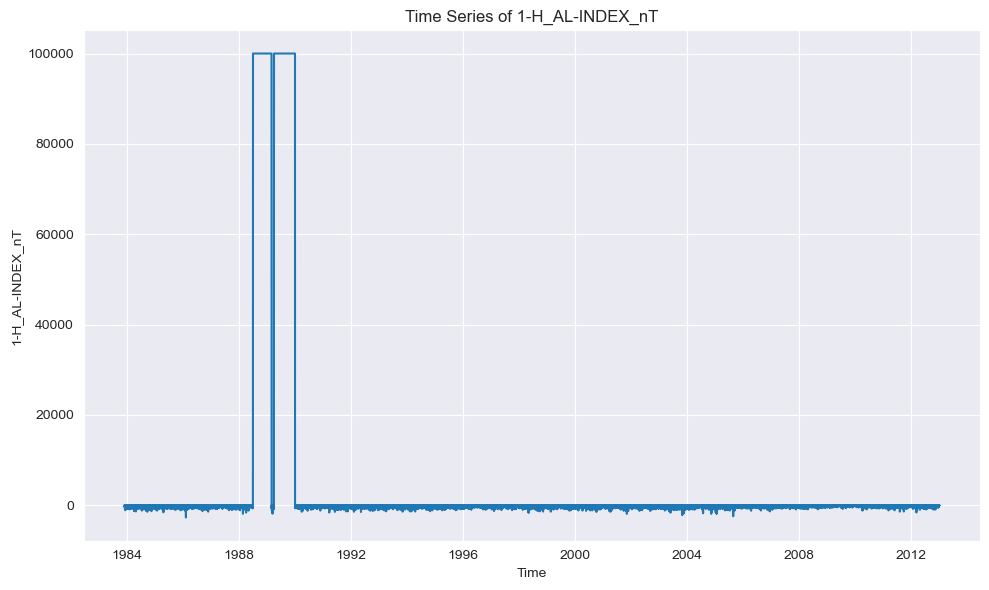

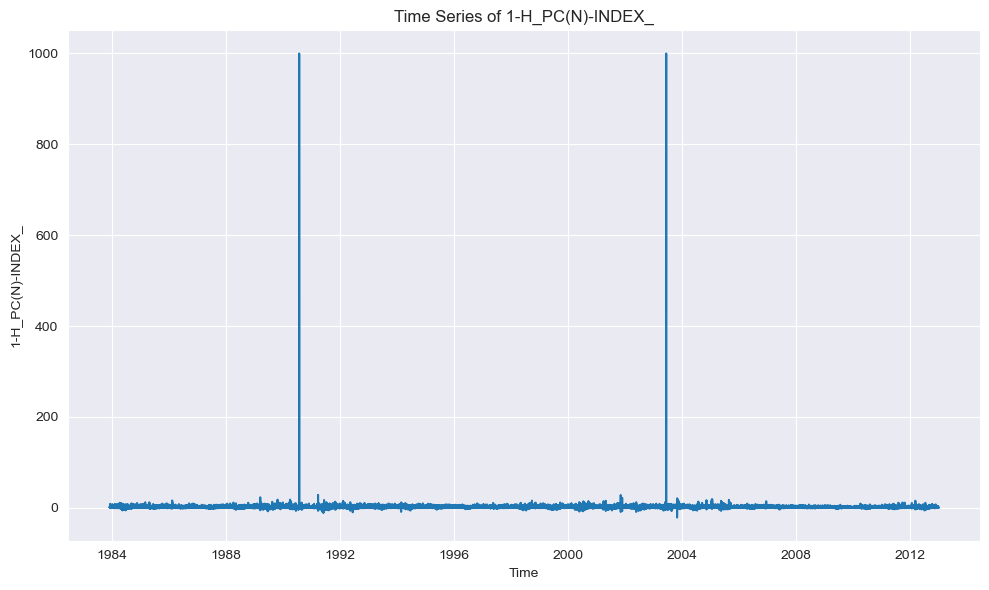

In [3]:
def plot_all_columns(df):
    """
    Plots all columns in the provided DataFrame against the given time column.
    Each column (except the specified time column) will be plotted on its own figure.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the time column and other data columns.
        time_col (str): The name of the time column in df.
    """
    # Assume 'time_col' is the name of your datetime column
    time_col = 'TIME_AT_CENTER_OF_HOUR_yyyy-mm-ddThh:mm:ss.sssZ'
    # Ensure the time column is in the DataFrame
    if time_col not in df.columns:
        raise ValueError(f"Column '{time_col}' not found in DataFrame.")

    # Plot each column separately, skipping the time column
    for col in df.columns:
        if col != time_col:
            plt.figure(figsize=(10, 6))
            plt.plot(df[time_col], df[col])
            plt.xlabel('Time')
            plt.ylabel(col)
            plt.title(f'Time Series of {col}')
            plt.tight_layout()
            plt.show()
plot_all_columns(omni_df)

In [4]:
omni_df.describe()

1AU_IP_MAG_AVG_B-VECTOR_nT  1AU_IP_BX__GSE_nT  1AU_IP_BY__GSM_nT  \
count               254976.000000      254976.000000      254976.000000   
mean                   229.163719         224.986131         224.922812   
std                    415.254803         417.509050         417.545267   
min                      0.100000         -40.800000         -43.100000   
25%                      3.900000          -1.900000          -1.900000   
50%                      5.700000           1.700000           1.400000   
75%                     12.400000           6.400000           7.100000   
max                    999.900000         999.900000         999.900000   

       1AU_IP_BZ__GSM_nT  1AU_IP_N_(ION)_Per_cc  1AU_IP_PLASMA_SPEED_Km/s  \
count      254976.000000          254976.000000             254976.000000   
mean          224.951548             258.026262               2696.960024   
std           417.524147             431.921567               4063.664352   
min           -57.800000               0.100000                228.000000   
25%            -1.000000               3.800000                374.000000   
50%             0.800000               6.900000                455.000000   
75%             5.600000             999.900000                705.000000   
max           999.900000             999.900000               9999.000000   

       1AU_IP_FLOW_PRESSURE_nPa  DAILY_SUNSPOT_NO_   DAILY_F10.7_  \
count             254976.000000      254976.000000  254976.000000   
mean                  26.979092          81.194842     118.287669   
std                   42.536379          76.185503      57.393127   
min                    0.030000           0.000000      65.100000   
25%                    1.400000          17.000000      75.500000   
50%                    2.320000          58.000000      98.900000   
75%                   99.990000         130.000000     147.600000   
max                   99.990000         410.000000     999.900000   

          3-H_KP*10_     1-H_DST_nT      1-H_AE_nT  1-H_AL-INDEX_nT  \
count  254976.000000  254976.000000  254976.000000    254976.000000   
mean       21.229516     -15.980312     679.064473      4756.768810   
std        14.356918      23.126009    2120.056219     21563.344541   
min         0.000000    -589.000000       3.000000     -2740.000000   
25%        10.000000     -24.000000      55.000000      -165.000000   
50%        20.000000     -12.000000     130.000000       -56.000000   
75%        30.000000      -2.000000     320.000000       -20.000000   
max        90.000000      81.000000    9999.000000     99999.000000   

       1-H_PC(N)-INDEX_  
count     254976.000000  
mean           1.194148  
std           11.451894  
min          -21.500000  
25%            0.200000  
50%            0.700000  
75%            1.700000  
max          999.900000

### OMNI Data Cleaning

Decision: Should I fill missing NaN values?

In [5]:
# Define thresholds for "impossible" values for each column
# These are example thresholds and should be adjusted as appropriate:
mask_time = omni_df['TIME_AT_CENTER_OF_HOUR_yyyy-mm-ddThh:mm:ss.sssZ'].notna()  # Just ensure time is not NaT
mask_mag = omni_df['1AU_IP_MAG_AVG_B-VECTOR_nT'] < 999
mask_bx = omni_df['1AU_IP_BX__GSE_nT'] < 999
mask_by = omni_df['1AU_IP_BY__GSM_nT'] < 999
mask_bz = omni_df['1AU_IP_BZ__GSM_nT'] < 999
mask_ion = omni_df['1AU_IP_N_(ION)_Per_cc'] < 999
mask_speed = omni_df['1AU_IP_PLASMA_SPEED_Km/s'] < 9999
mask_flow = omni_df['1AU_IP_FLOW_PRESSURE_nPa'] < 9999
mask_sunspot = omni_df['DAILY_SUNSPOT_NO_'] < 1000
mask_f107 = omni_df['DAILY_F10.7_'] < 999
mask_kp = omni_df['3-H_KP*10_'] < 999
mask_dst = omni_df['1-H_DST_nT'] < 999
mask_ae = omni_df['1-H_AE_nT'] < 9999 #setting AE higher cause of gap
mask_al = omni_df['1-H_AL-INDEX_nT'] < 9999
mask_pc = omni_df['1-H_PC(N)-INDEX_'] < 999

# Combine all masks
valid_mask = (mask_time & mask_mag & mask_bx & mask_by & mask_bz & 
              mask_ion & mask_speed & mask_flow & mask_sunspot & 
              mask_f107 & mask_kp & mask_dst & mask_ae & mask_al & mask_pc)

# Apply the mask to filter the DataFrame
omni_df_cleaned = omni_df[valid_mask]
omni_df_cleaned.describe()

1AU_IP_MAG_AVG_B-VECTOR_nT  1AU_IP_BX__GSE_nT  1AU_IP_BY__GSM_nT  \
count               183558.000000      183558.000000      183558.000000   
mean                     5.380615           0.026407           0.005099   
std                      3.093684           3.647688           3.950015   
min                      0.100000         -40.800000         -30.000000   
25%                      3.400000          -2.600000          -2.500000   
50%                      4.700000           0.000000           0.000000   
75%                      6.500000           2.700000           2.500000   
max                     55.700000          34.800000          39.600000   

       1AU_IP_BZ__GSM_nT  1AU_IP_N_(ION)_Per_cc  1AU_IP_PLASMA_SPEED_Km/s  \
count      183558.000000          183558.000000             183558.000000   
mean           -0.006513               6.564905                438.980039   
std             3.100884               5.364361                105.208156   
min           -50.900000               0.100000                228.000000   
25%            -1.500000               3.200000                361.000000   
50%             0.000000               5.000000                414.000000   
75%             1.500000               8.100000                497.000000   
max            41.600000             112.300000               1154.000000   

       1AU_IP_FLOW_PRESSURE_nPa  DAILY_SUNSPOT_NO_   DAILY_F10.7_  \
count             183558.000000      183558.000000  183558.000000   
mean                   2.215482          71.020228     110.623033   
std                    1.876257          69.426668      45.397620   
min                    0.030000           0.000000      65.100000   
25%                    1.200000          15.000000      74.300000   
50%                    1.780000          49.000000      92.700000   
75%                    2.650000         114.000000     136.100000   
max                   71.040000         397.000000     359.200000   

          3-H_KP*10_     1-H_DST_nT      1-H_AE_nT  1-H_AL-INDEX_nT  \
count  183558.000000  183558.000000  183558.000000    183558.000000   
mean       19.995467     -14.411298     192.971377      -119.919540   
std        14.089626      21.253360     205.738711       148.897106   
min         0.000000    -422.000000       3.000000     -2740.000000   
25%        10.000000     -22.000000      50.000000      -166.000000   
50%        17.000000     -11.000000     112.000000       -58.000000   
75%        30.000000      -2.000000     267.000000       -22.000000   
max        90.000000      77.000000    2503.000000        22.000000   

       1-H_PC(N)-INDEX_  
count     183558.000000  
mean           1.026149  
std            1.361665  
min           -9.200000  
25%            0.200000  
50%            0.700000  
75%            1.600000  
max           21.900000

In [6]:
omni_df_cleaned.head()

TIME_AT_CENTER_OF_HOUR_yyyy-mm-ddThh:mm:ss.sssZ  \
96                        1983-12-05 00:30:00+00:00   
97                        1983-12-05 01:30:00+00:00   
98                        1983-12-05 02:30:00+00:00   
99                        1983-12-05 03:30:00+00:00   
101                       1983-12-05 05:30:00+00:00   

     1AU_IP_MAG_AVG_B-VECTOR_nT  1AU_IP_BX__GSE_nT  1AU_IP_BY__GSM_nT  \
96                          9.9               -6.2                7.7   
97                          9.4               -5.0                7.8   
98                          9.0               -5.7                6.4   
99                          9.1               -6.6                2.1   
101                        10.4               -5.4                8.9   

     1AU_IP_BZ__GSM_nT  1AU_IP_N_(ION)_Per_cc  1AU_IP_PLASMA_SPEED_Km/s  \
96                -0.1                   11.2                     385.0   
97                 1.7                   12.4                     393.0   
98                -2.9                   12.3                     397.0   
99                -5.9                   12.7                     396.0   
101               -1.5                   10.7                     421.0   

     1AU_IP_FLOW_PRESSURE_nPa  DAILY_SUNSPOT_NO_  DAILY_F10.7_  3-H_KP*10_  \
96                       3.46                 23          92.0          30   
97                       3.93                 23          92.0          30   
98                       3.95                 23          92.0          30   
99                       4.02                 23          92.0          33   
101                      3.91                 23          92.0          33   

     1-H_DST_nT  1-H_AE_nT  1-H_AL-INDEX_nT  1-H_PC(N)-INDEX_  
96           20         28               -8               0.3  
97           17         55              -28               0.4  
98           12        160             -127               1.2  
99           -1        320             -260               3.3  
101           1        241             -149               1.9

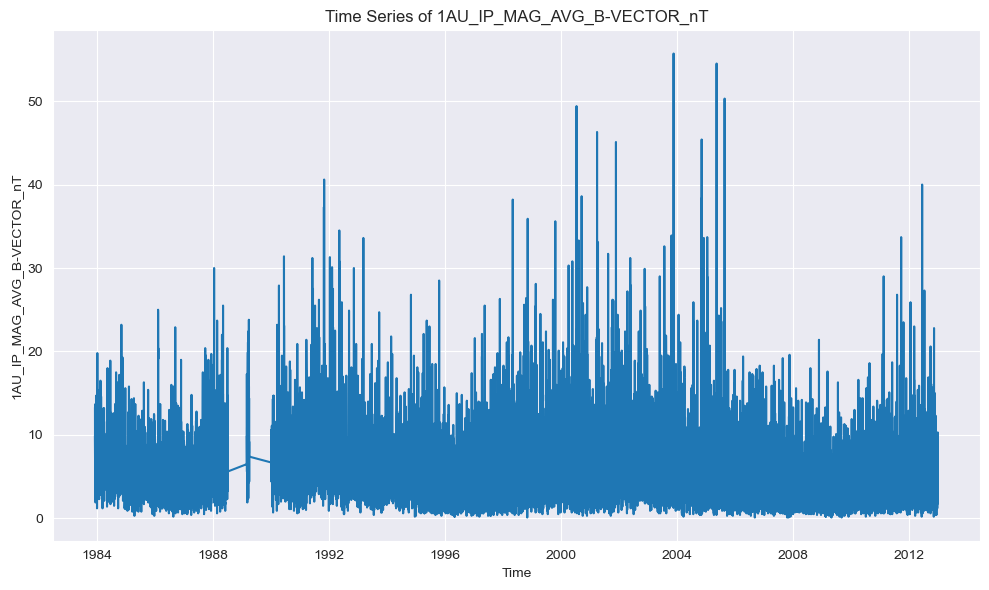

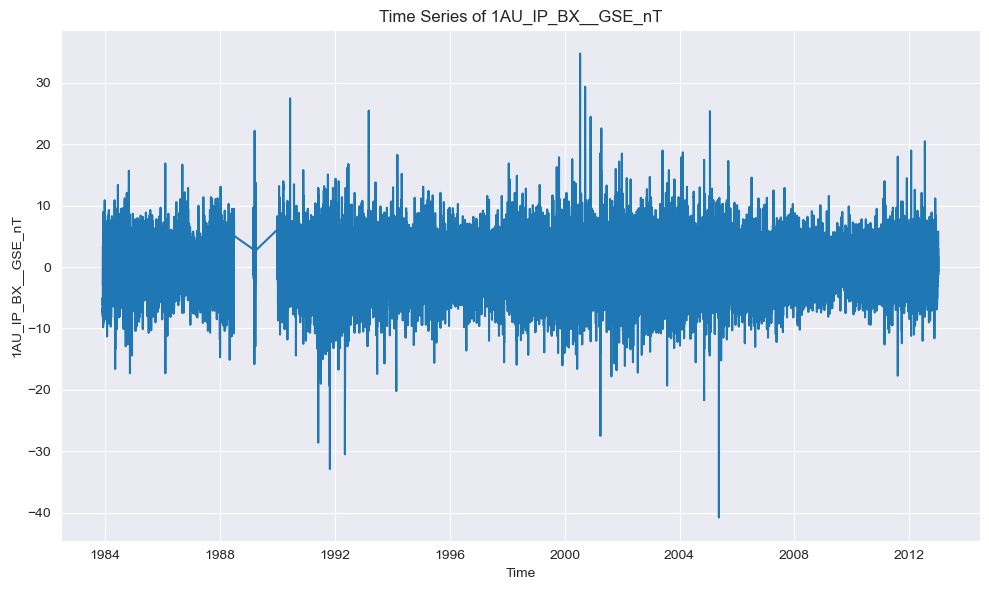

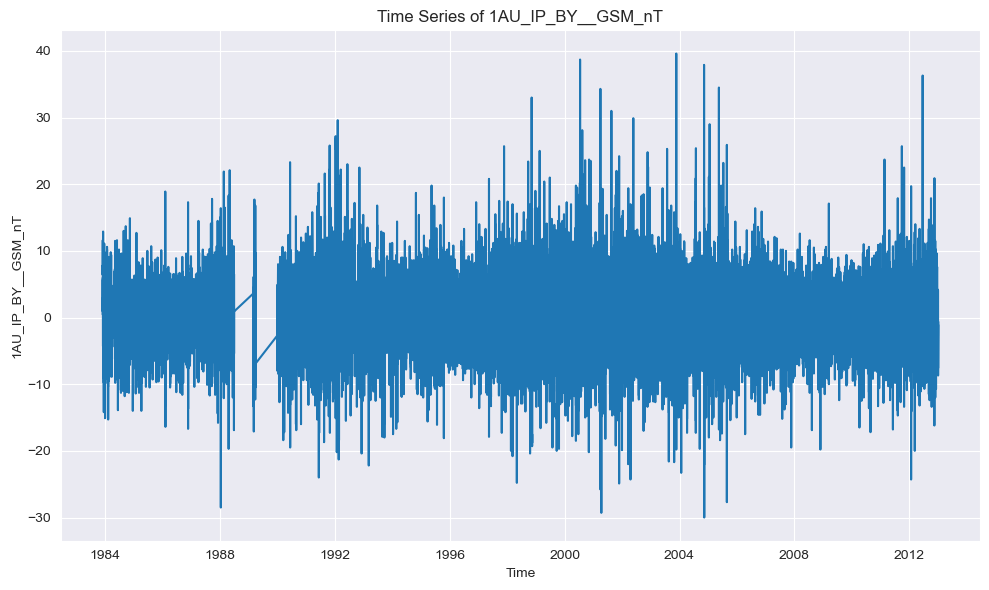

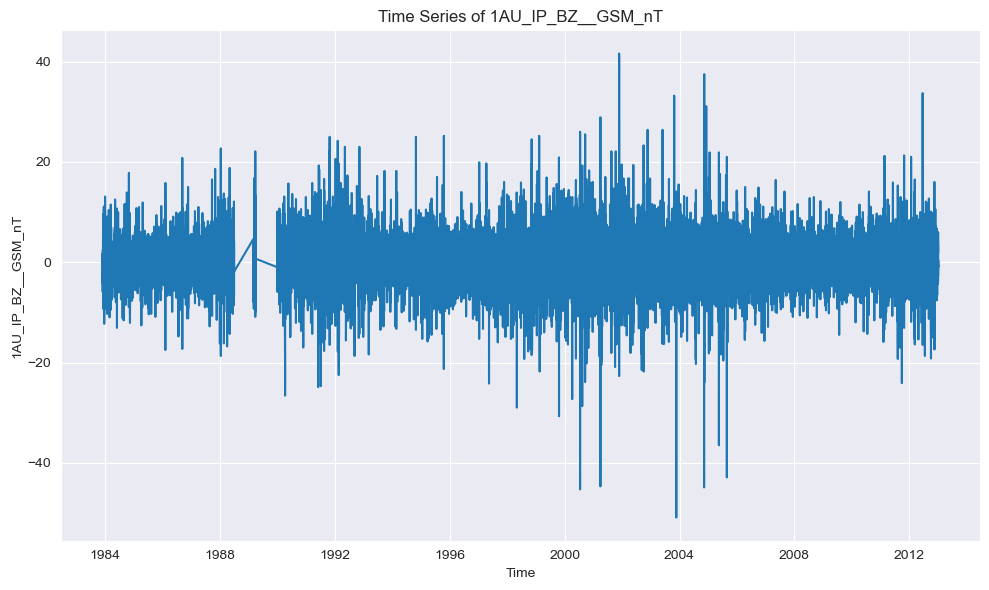

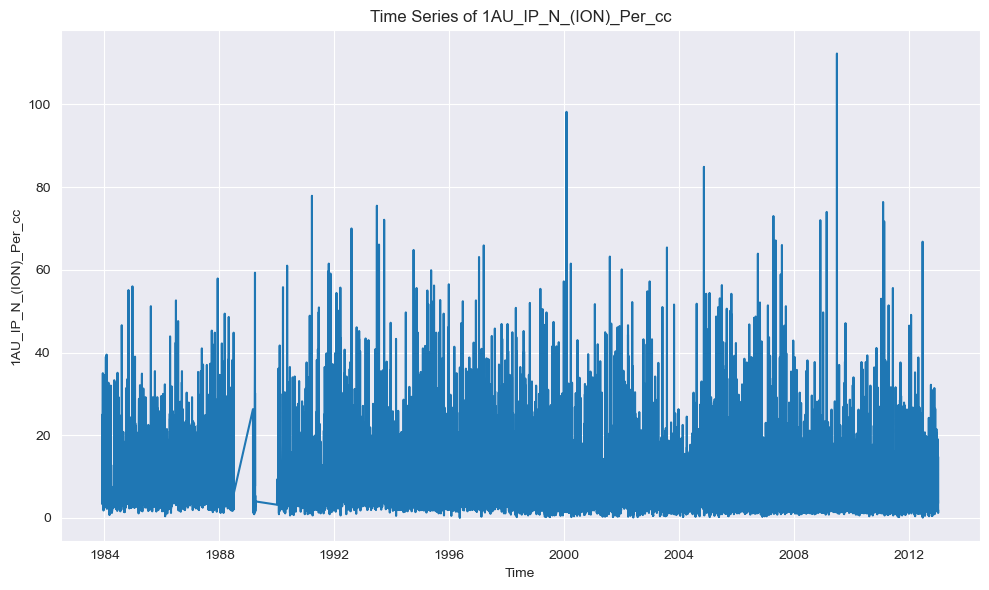

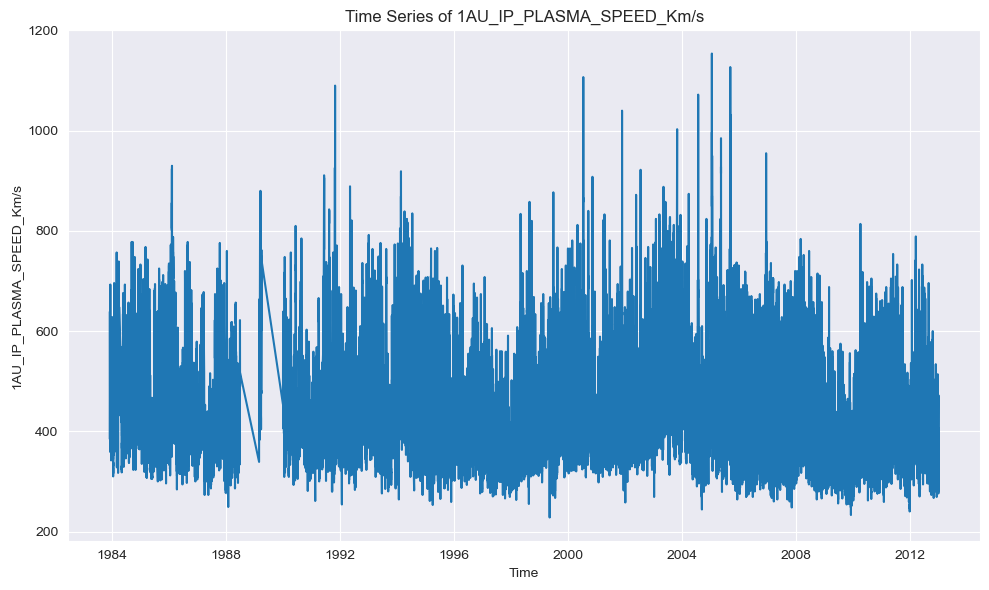

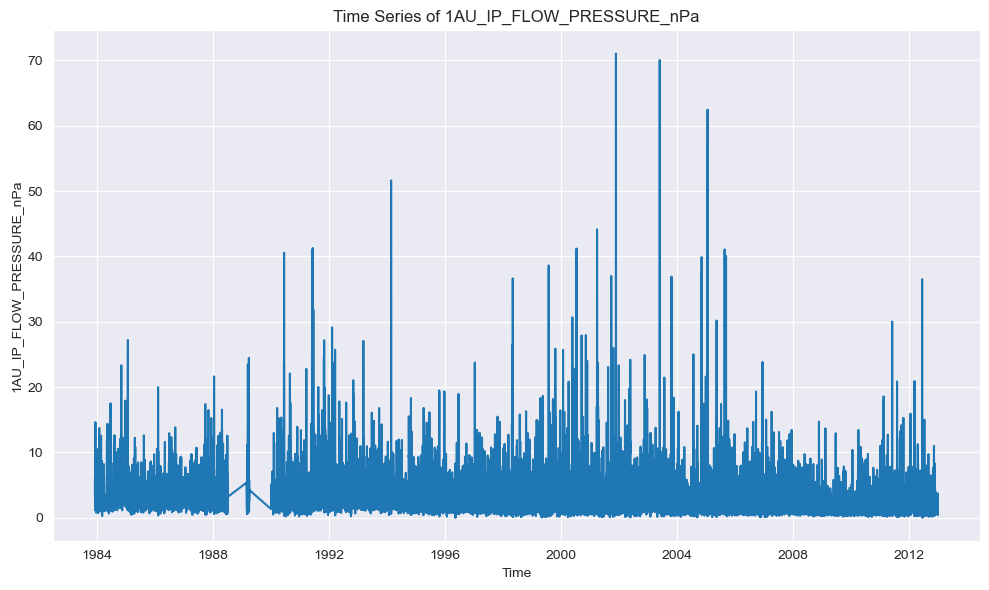

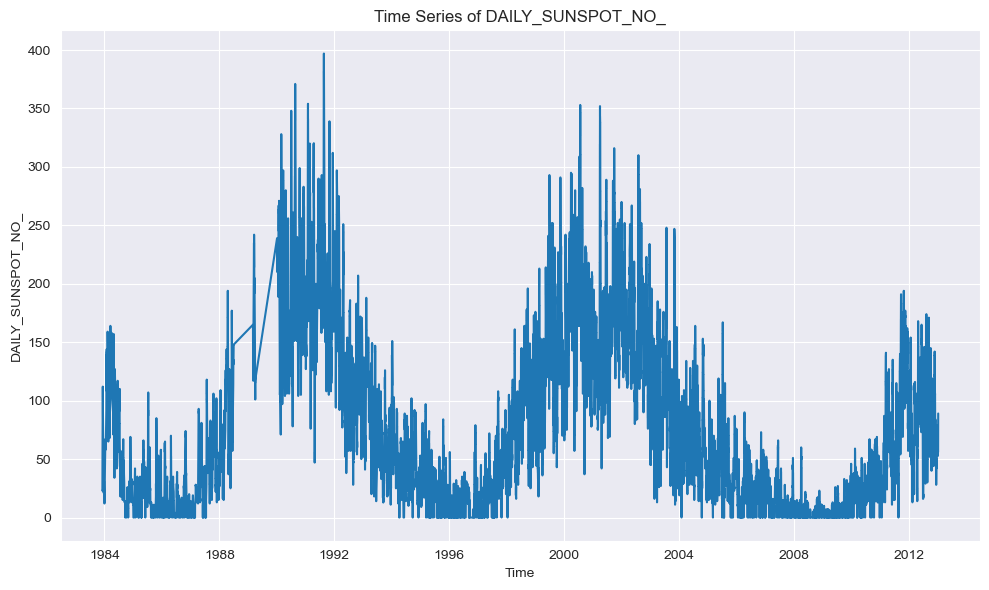

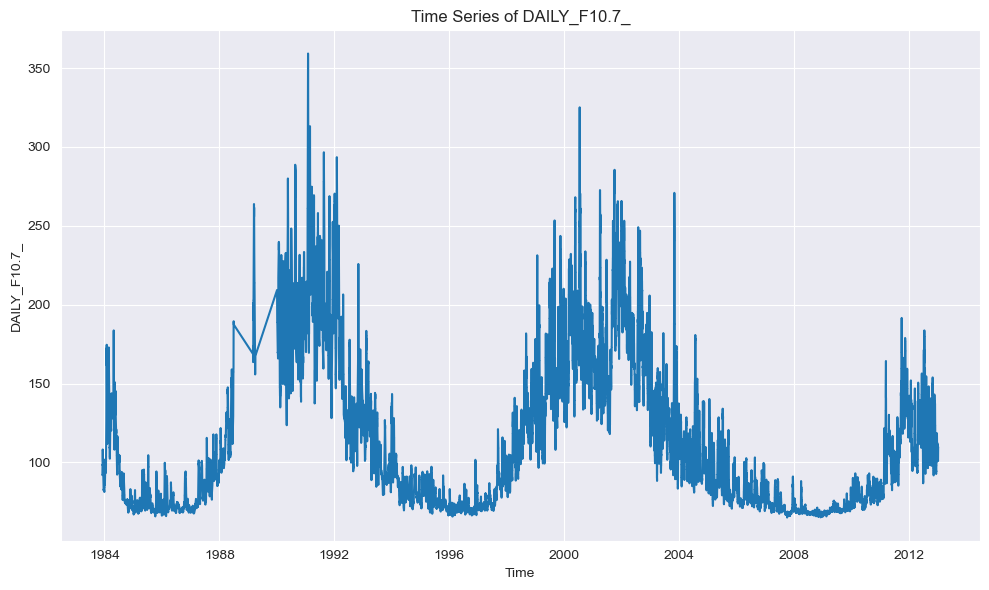

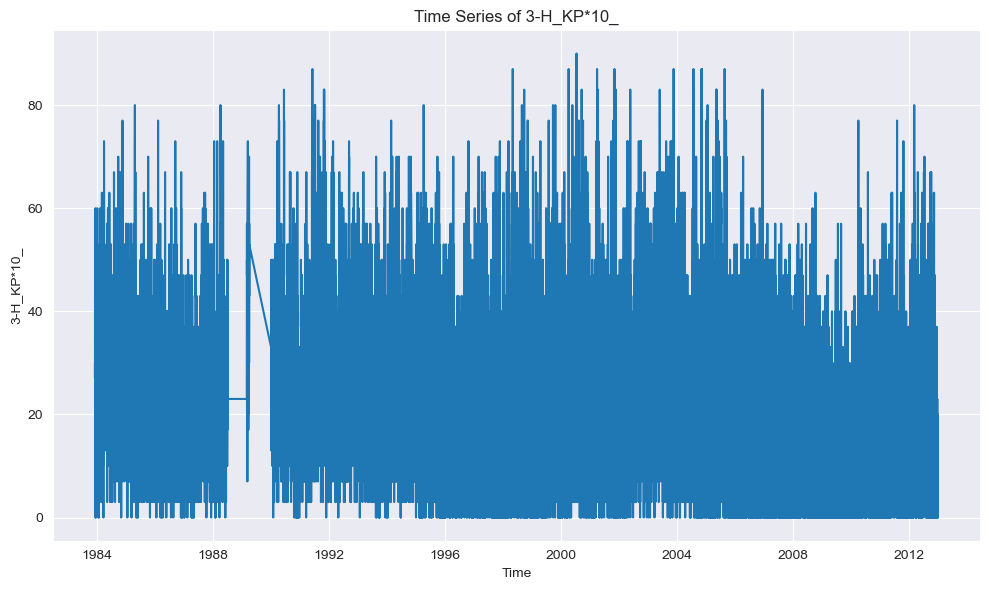

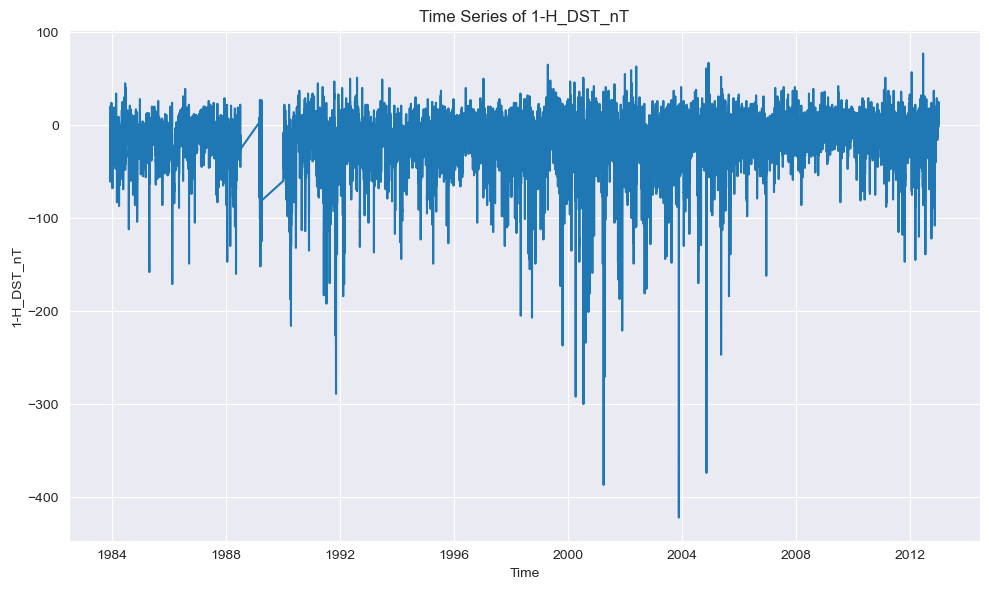

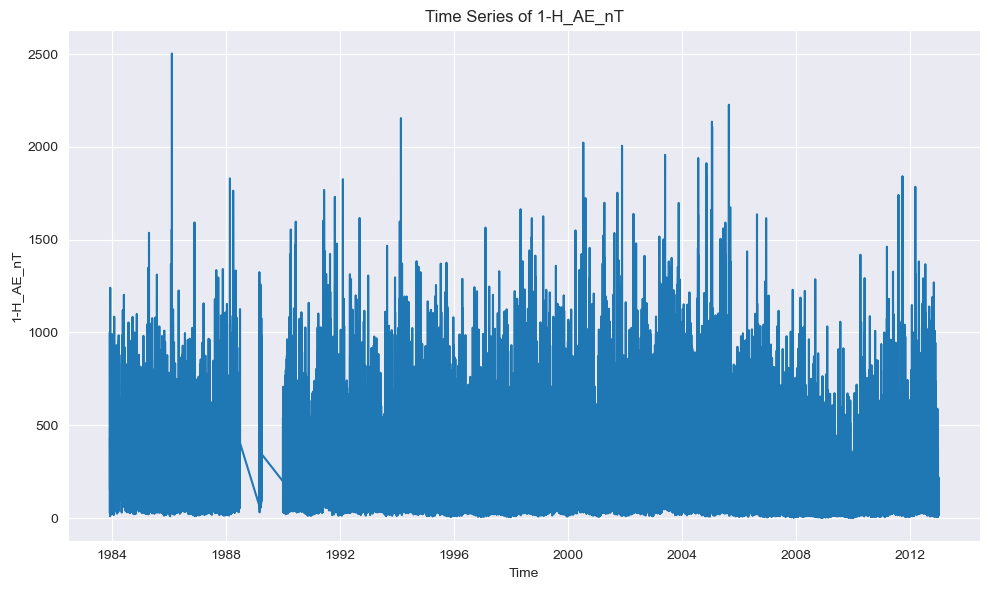

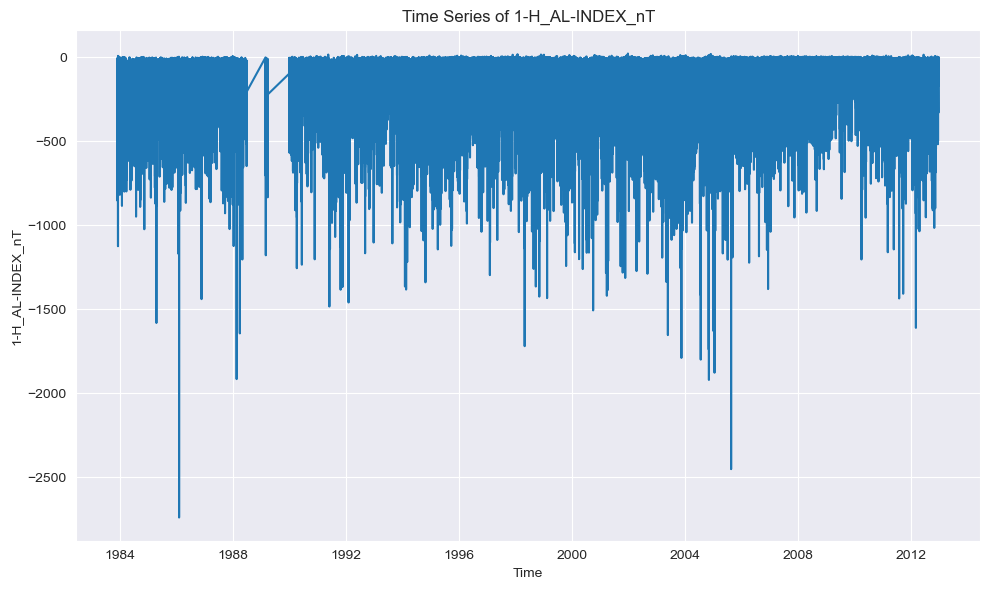

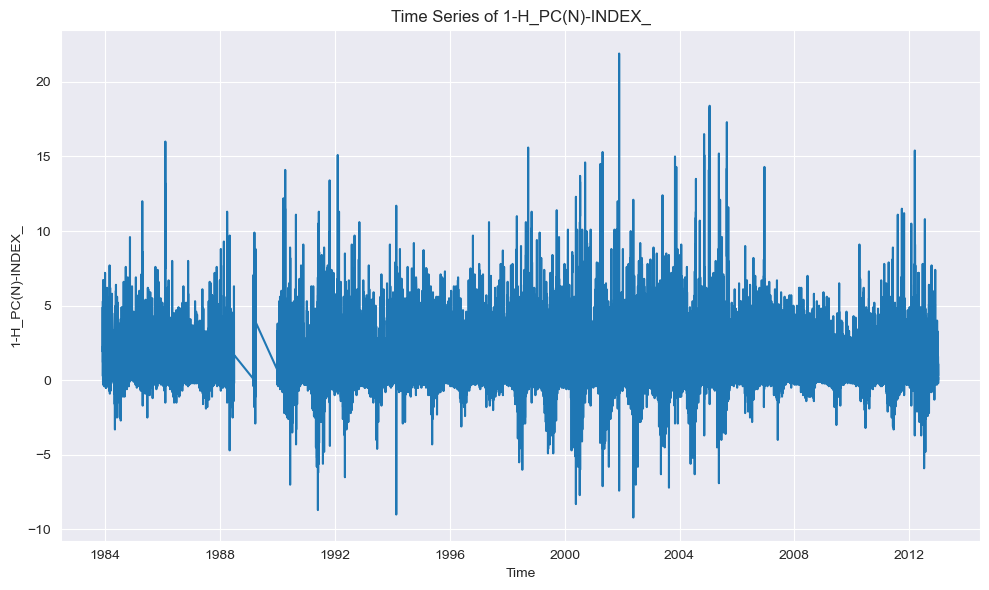

In [7]:
plot_all_columns(omni_df_cleaned)

/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


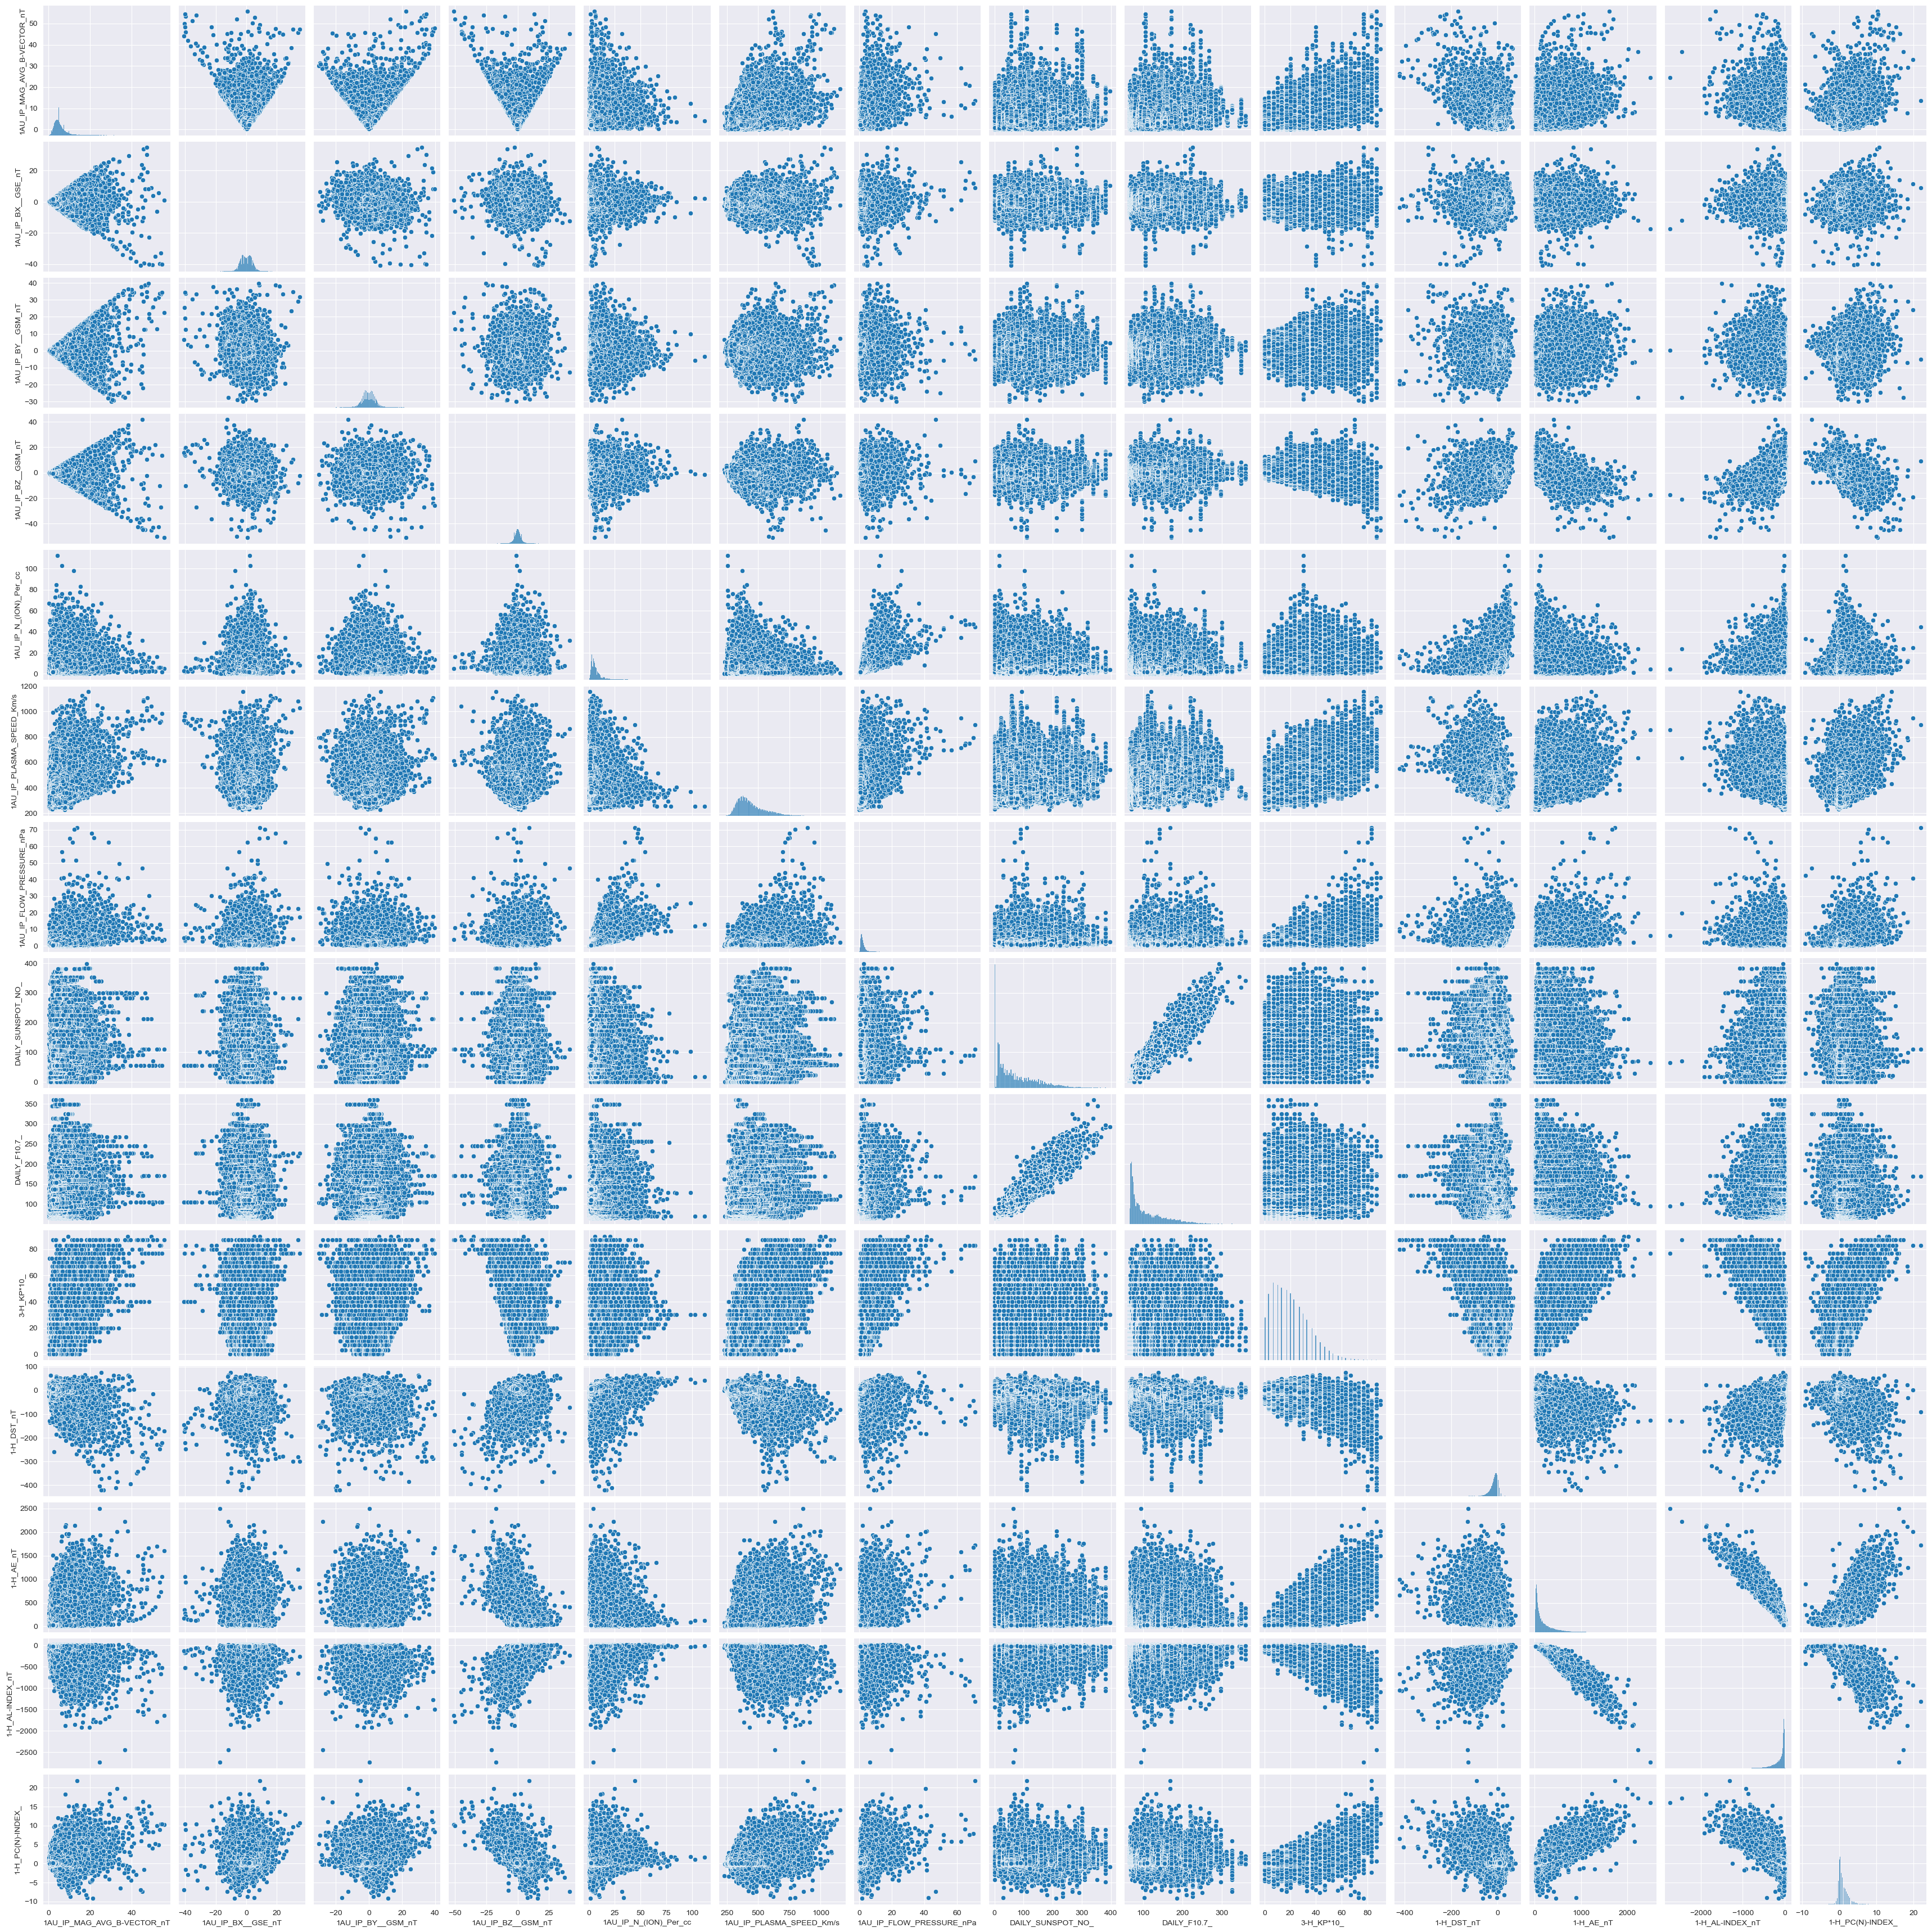

In [8]:
import seaborn as sns
sns.pairplot(omni_df_cleaned)

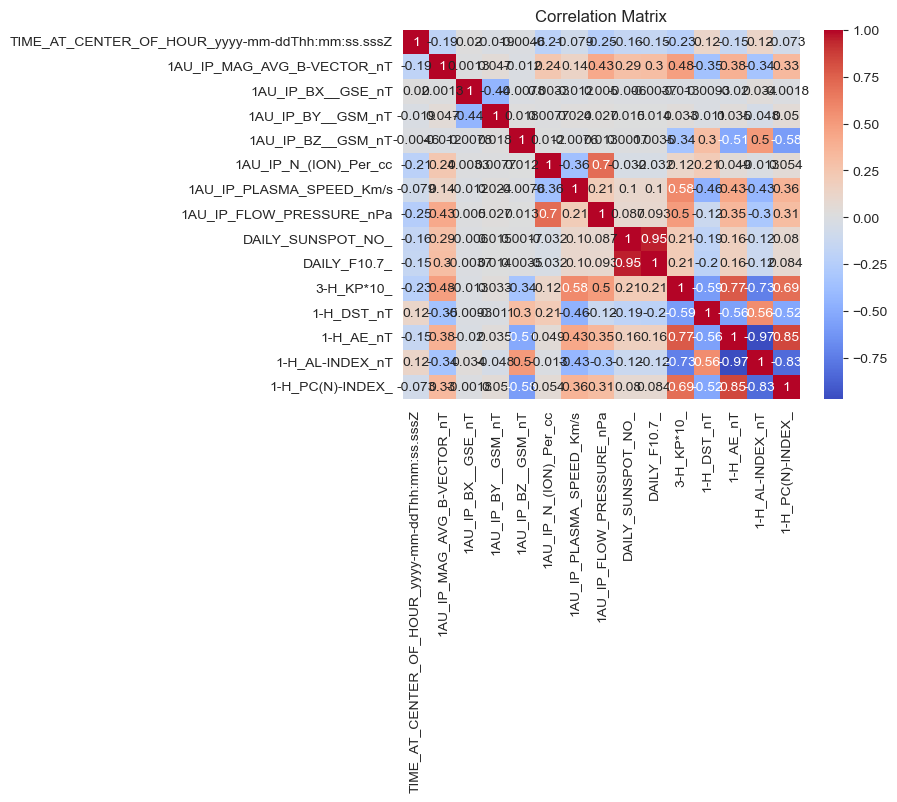

In [9]:
corr_matrix = omni_df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()